# OBSERVATÓRIO PUC-CAMPINAS

# BOLETIM COVID-19 RMC
***
### SCRIPT PARA CURVA EPIDEMIOLÓGICA PARA A REGIÃO METROPOLITANA DE CAMPINAS
#### PUBLICAÇÃO Nº 07
Período analisado: 19/FEV - 04/JUL
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as image

import locale

locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv", sep=";", decimal=",")

https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv

In [3]:
df.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,0.0,0.0,0,...,Marília,5,33894,7398,41199,0,8.0,-21.6820,-51.0737,9
1,Adolfo,3500204,25,2,2020-02-25,0,0,0.0,0.0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,-21.2325,-49.6451,9
2,Aguaí,3500303,25,2,2020-02-25,0,0,0.0,0.0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,-22.0572,-46.9735,9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,0.0,0.0,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,-21.9319,-46.7176,9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,0.0,0.0,0,...,Campinas,3,18374,3275,6013,0,8.0,-22.4733,-46.6314,9


In [4]:
df['nome_drs'].unique()

array(['Marília', 'São José do Rio Preto', 'São João da Boa Vista',
       'Campinas', 'Bauru', 'Piracicaba', 'Sorocaba',
       'Presidente Prudente', 'Barretos', 'Ribeirão Preto', 'Araçatuba',
       'Araraquara', 'Taubaté', 'Franca', 'Grande São Paulo', 'Registro',
       'Baixada Santista', nan], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82661 entries, 0 to 82660
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nome_munic     82661 non-null  object 
 1   codigo_ibge    82661 non-null  int64  
 2   dia            82661 non-null  int64  
 3   mes            82661 non-null  int64  
 4   datahora       82661 non-null  object 
 5   casos          82661 non-null  int64  
 6   casos_novos    82661 non-null  int64  
 7   casos_pc       82661 non-null  float64
 8   casos_mm7d     82661 non-null  float64
 9   obitos         82661 non-null  int64  
 10  obitos_novos   82661 non-null  int64  
 11  obitos_pc      82661 non-null  float64
 12  obitos_mm7d    82661 non-null  float64
 13  letalidade     82661 non-null  float64
 14  nome_ra        82530 non-null  object 
 15  cod_ra         82661 non-null  int64  
 16  nome_drs       82530 non-null  object 
 17  cod_drs        82661 non-null  int64  
 18  pop   

In [6]:
# Selecionando as observações correspondentes a Campinas.
dfcps = df[df['codigo_ibge'] == 3509502]
print(dfcps.shape)

# Selecionando as observações correspondentes a Regiao Metropolitana de Campinas.
cod_rmc = [3501608, 3503802, 3509502, 3512803, 3515152, 3519055, 3519071,
           3520509, 3523404, 3524709, 3531803, 3532009, 3533403, 3536505,
           3537107, 3545803, 3548005, 3552403, 3556206, 3556701]

dfrmc = df[df['codigo_ibge'].isin(cod_rmc)]
print(dfrmc.shape)


# Selecionando as observações correspondentes ao Departamento de Saude
cod_dep_saude = [3500501, 3501608 ,3501905, 3503802, 3504107, 3507100, 3507605,
                 3508405, 3509502, 3509601, 3512803, 3519055, 3519071, 3520509,
                 3523404, 3524006, 3524709, 3525201, 3525508, 3525904, 3527009,
                 3527306, 3531209, 3531803, 3532009, 3532405, 3533403, 3536505,
                 3536802, 3537107, 3538204, 3538600, 3545803, 3548005, 3551603,
                 3552106, 3552403, 3554953, 3556206, 3556354, 3556503, 3556701]

df_dep_saude = df[df['codigo_ibge'].isin(cod_dep_saude)]
print(df_dep_saude.shape)


dfsp = df[df['codigo_ibge'] < 3600000]
print(dfsp.shape)

(131, 26)
(2620, 26)
(5502, 26)
(82530, 26)


In [7]:
dfcps = dfcps[['datahora', 'casos_novos', 'obitos_novos']]
dfcps.columns = ['date', 'newCases', 'newDeaths']


dfrmc = dfrmc[['datahora', 'casos_novos', 'obitos_novos']]
dfrmc.columns = ['date', 'newCases', 'newDeaths']

df_dep_saude = df_dep_saude[['datahora', 'casos_novos', 'obitos_novos']]
df_dep_saude.columns = ['date', 'newCases', 'newDeaths']

dfsp = dfsp[['datahora', 'casos_novos', 'obitos_novos']]
dfsp.columns = ['date', 'newCases', 'newDeaths']

In [8]:
dfcps['date'] = pd.to_datetime(dfcps['date'], format="%Y/%m/%d")

dfrmc['date'] = pd.to_datetime(dfrmc['date'], format="%Y/%m/%d")

df_dep_saude['date'] = pd.to_datetime(df_dep_saude['date'], format="%Y/%m/%d")

dfsp['date'] = pd.to_datetime(dfsp['date'], format="%Y/%m/%d")

In [9]:
dfcps_grouped = dfcps.groupby(by = "date", sort=True).sum().reset_index(drop=False)

dfrmc_grouped = dfrmc.groupby(by = "date", sort=True).sum().reset_index(drop=False)

df_ds_grouped = df_dep_saude.groupby(by = "date", sort=True).sum().reset_index(drop=False)
df_ds_grouped.tail()

dfsp_grouped = dfsp.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfsp_grouped.tail()

,date,newCases,newDeaths
126,2020-06-30,6249,368
127,2020-07-01,8532,268
128,2020-07-02,12221,321
129,2020-07-03,8318,344
130,2020-07-04,2249,303


In [10]:
dfcps_gweek = dfcps_grouped.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')

dfrmc_gweek = dfrmc_grouped.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')

df_ds_gweek = df_ds_grouped.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
df_ds_gweek

,date,newCases,newDeaths
0,2020-02-29,0,0
1,2020-03-07,0,0
2,2020-03-14,0,0
3,2020-03-21,3,0
4,2020-03-28,9,0
5,2020-04-04,40,5
6,2020-04-11,139,9
7,2020-04-18,210,16
8,2020-04-25,195,27
9,2020-05-02,421,21


In [11]:
dfdrs = df[['datahora', 'casos_novos', 'obitos_novos', 'nome_drs']]
dfdrs.columns = ['date', 'newCases', 'newDeaths', 'nome_drs']
dfdrs['date'] = pd.to_datetime(dfdrs['date'], format="%Y/%m/%d")

dfmarilia = dfdrs[dfdrs['nome_drs'] == 'Marília']
dfsjrp = dfdrs[dfdrs['nome_drs'] == 'São José do Rio Preto']
dfsjbv = dfdrs[dfdrs['nome_drs'] == 'São João da Boa Vista']
dfbauru = dfdrs[dfdrs['nome_drs'] == 'Bauru']
dfpira = dfdrs[dfdrs['nome_drs'] == 'Piracicaba']
dfsorocaba = dfdrs[dfdrs['nome_drs'] == 'Sorocaba']
dfpp = dfdrs[dfdrs['nome_drs'] == 'Presidente Prudente']
dfbarretos = dfdrs[dfdrs['nome_drs'] == 'Barretos']
dfribeirao = dfdrs[dfdrs['nome_drs'] == 'Ribeirão Preto']
dfaracatuba = dfdrs[dfdrs['nome_drs'] == 'Araçatuba']
dfararaquara = dfdrs[dfdrs['nome_drs'] == 'Araraquara']
dftaubate = dfdrs[dfdrs['nome_drs'] == 'Taubaté']
dffranca = dfdrs[dfdrs['nome_drs'] == 'Franca']
dfgdesp = dfdrs[dfdrs['nome_drs'] == 'Grande São Paulo']
dfregistro = dfdrs[dfdrs['nome_drs'] == 'Registro']
dfbaixada = dfdrs[dfdrs['nome_drs'] == 'Baixada Santista']

df_drs_list = [dfmarilia, dfsjrp, dfsjbv, dfbauru, dfpira, dfsorocaba, dfpp, dfbarretos, dfribeirao, dfaracatuba, dfararaquara, dftaubate, dffranca, dfgdesp, dfregistro, dfbaixada]

# dfmarilia, dfsjrp, dfsjbv, dfbauru, dfpira, dfsorocaba,
# dfpp, dfbarretos, dfribeirao, dfaracatuba, dfararaquara,
# dftaubate, dffranca, dfgdesp, dfregistro, dfbaixada = (df.apply(pd.DataFrame.groupby(self, by = "date", sort=True).sum().reset_index(drop=False)) for df in df_drs_list)


# dfmarilia, dfsjrp, dfsjbv, dfbauru, dfpira, dfsorocaba,
# dfpp, dfbarretos, dfribeirao, dfaracatuba, dfararaquara,
# dftaubate, dffranca, dfgdesp, dfregistro, dfbaixada = (df.apply(pd.DataFrame.groupby(self, pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')) for df in df_drs_list)

dfmarilia = dfmarilia.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfsjrp = dfsjrp.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfsjbv = dfsjbv.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfbauru = dfbauru.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfpira = dfpira.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfsorocaba = dfsorocaba.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfpp = dfpp.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfbarretos = dfbarretos.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfribeirao = dfribeirao.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfaracatuba = dfaracatuba.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfararaquara = dfararaquara.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dftaubate = dftaubate.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dffranca = dffranca.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfgdesp = dfgdesp.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfregistro = dfregistro.groupby(by = "date", sort=True).sum().reset_index(drop=False)
dfbaixada = dfbaixada.groupby(by = "date", sort=True).sum().reset_index(drop=False)



dfmarilia = dfmarilia.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfsjrp = dfsjrp.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfsjbv = dfsjbv.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfbauru = dfbauru.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfpira = dfpira.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfsorocaba = dfsorocaba.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfpp = dfpp.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfbarretos = dfbarretos.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfribeirao = dfribeirao.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfaracatuba = dfaracatuba.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfararaquara = dfararaquara.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dftaubate = dftaubate.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dffranca = dffranca.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfgdesp = dfgdesp.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfregistro = dfregistro.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfbaixada = dfbaixada.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')

# dfmarilia.drop(17, axis=0, inplace=True)
# dfsjrp.drop(17, axis=0, inplace=True)
# dfsjbv.drop(17, axis=0, inplace=True)
# dfbauru.drop(17, axis=0, inplace=True)
# dfpira.drop(17, axis=0, inplace=True)
# dfsorocaba.drop(17, axis=0, inplace=True)
# dfpp.drop(17, axis=0, inplace=True)
# dfbarretos.drop(17, axis=0, inplace=True)
# dfribeirao.drop(17, axis=0, inplace=True)
# dfaracatuba.drop(17, axis=0, inplace=True)
# dfararaquara.drop(17, axis=0, inplace=True)
# dftaubate.drop(17, axis=0, inplace=True)
# dffranca.drop(17, axis=0, inplace=True)
# dfgdesp.drop(17, axis=0, inplace=True)
# dfregistro.drop(17, axis=0, inplace=True)
# dfbaixada.drop(17, axis=0, inplace=True)

/Users/nicholaslepetit/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
dfrmc_gweek
#dfcps_gweek.drop(17, axis=0, inplace=True)
#dfrmc_gweek.drop(17, axis=0, inplace=True)
#df_ds_gweek.drop(17, axis=0, inplace=True)
#dfsp_gweek.drop(17, axis=0, inplace=True)

,date,newCases,newDeaths
0,2020-02-29,0,0
1,2020-03-07,0,0
2,2020-03-14,0,0
3,2020-03-21,3,0
4,2020-03-28,5,0
5,2020-04-04,32,5
6,2020-04-11,93,3
7,2020-04-18,145,8
8,2020-04-25,123,9
9,2020-05-02,267,17


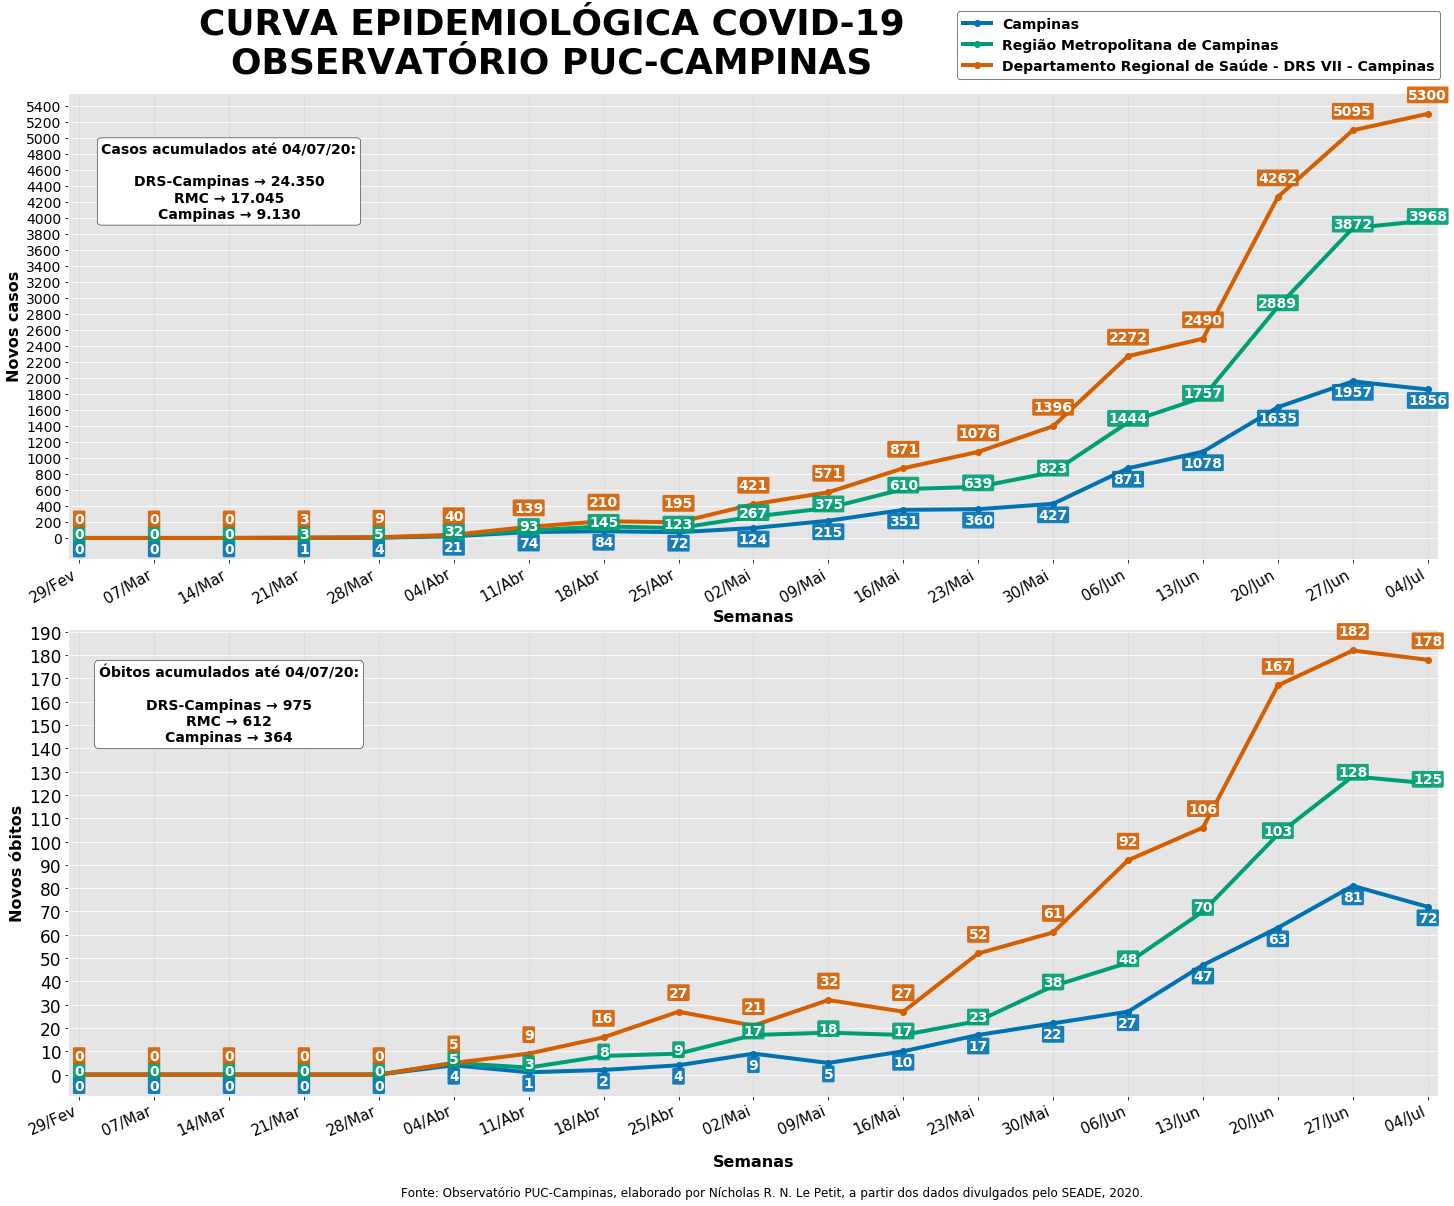

In [17]:



#plt.style.use('seaborn')
plt.style.use('ggplot')

pltblue = '#0072b2'
pltred = '#d55e00'
pltgreen = '#009e74'
plttextcolor = '#000000'
mpl.rcParams.update({'text.color': plttextcolor})


# Criando a estrutura de subplots
fig, (axnc1_sp, axnc2_sp) = plt.subplots(2,1,sharex=False, figsize=(20,16))
fig.subplots_adjust(hspace=25)


##########################################################################
############################# PLOTANDO CASOS #############################

#logo_observatorio = cbook.get_sample_data('logo_observatorio_pucc.png', asfileobj=False)
#logoplot = axnc1.imshow(logo_observatorio, aspect='auto', extent=(1,15,0.3,0.7), alpha=0.5, origin='upper', zorder=-1)

axnc1 = dfcps_gweek.plot('date', 'newCases', marker="o", kind="line", linewidth=4, color=pltblue, x_compat=True, ax = axnc1_sp)
axnc1b = dfrmc_gweek.plot('date', 'newCases', marker="o", kind="line", linewidth=4, color=pltgreen, x_compat=True, ax = axnc1_sp)
axnc1c = df_ds_gweek.plot('date', 'newCases', marker="o", kind="line", linewidth=4, color=pltred, x_compat=True, ax = axnc1_sp)


# Plotando casos de outras DRS em cinza para referencia, com transparencia
# axnc1d = dfmarilia.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1e = dfsjrp.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1f = dfsjbv.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1g = dfbauru.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1h = dfpira.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1i = dfsorocaba.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1j = dfpp.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1k = dfbarretos.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1l = dfribeirao.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1m = dfaracatuba.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1n = dfararaquara.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1o = dftaubate.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1p = dffranca.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# #axnc1q = dfgdesp.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1r = dfregistro.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)
# axnc1s = dfbaixada.plot('date', 'newCases', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc1_sp)


gweek_n = dfrmc_gweek.shape[0]
gweek_xmin = dfrmc_gweek['date'].iloc[0]
gweek_xmax = dfrmc_gweek['date'].iloc[-1]
axnc1.set_xlim(gweek_xmin, gweek_xmax)
axnc1.set_xticks(pd.date_range(gweek_xmin, periods=gweek_n, freq='W-SAT'))

gweek_ymax = df_ds_gweek['newCases'].max()
axnc1.xaxis.set_major_formatter(mdates.DateFormatter("%d/%b"))
axnc1.set_yticks(np.arange(0,gweek_ymax+200,200), minor=False)
axnc1.tick_params(axis='both', which='minor', labelsize=14)
axnc1.tick_params(axis="x", which='both', colors = plttextcolor, labelsize=15)
axnc1.tick_params(axis="y", which='both', colors = plttextcolor, labelsize=14)
axnc1.grid(b=True, which='major', axis='x', color='lightgray', linestyle='--')
#axnc1.grid(b=True, which='minor', axis='x', linestyle='--')
axnc1.grid(b=True, which='major', axis='y', linestyle='-')

axnc1.set_xlim('2020-02-28', '2020-07-05')

axnc1.set_title("CURVA EPIDEMIOLÓGICA COVID-19\nOBSERVATÓRIO PUC-CAMPINAS", color=plttextcolor, fontweight='bold', fontsize=36)#52)
#axnc1.title.set_position([0.35,1.07])
axnc1.title.set_position([0.3525,1.03])
axnc1.set_xlabel("Semanas", color=plttextcolor, fontsize=16, fontweight='bold')
axnc1.set_ylabel("Novos casos", color=plttextcolor, fontsize=16, fontweight='bold')




legend = axnc1.legend(labels=["Campinas", "Região Metropolitana de Campinas", "Departamento Regional de Saúde - DRS VII - Campinas"], loc='upper right',
                      fancybox=True, fontsize=14, facecolor='#ffffff', edgecolor='black', frameon=True, shadow=False, framealpha=1, bbox_to_anchor=(1.0065,1.19))

for text in legend.get_texts():
    plt.setp(text, fontweight='bold')


plt.tight_layout(pad=0)
#plt.tight_layout()



##### Colocando valores de Campinas sobre a linha.
for x,y in zip(dfcps_gweek['date'],dfcps_gweek['newCases']):

    label = y

    
    axnc1.annotate(label,
                 (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center', 
                 bbox=dict(fc=pltblue, alpha=0.9, ec='none', boxstyle='round',pad=0.1),
                 fontweight=1000,
                 color='white',
                 fontsize=14)



##### Colocando valores da RMC sobre a linha.
for x,y in zip(dfrmc_gweek['date'],dfrmc_gweek['newCases']):

    label = y

    
    axnc1.annotate(label,
                 (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center', 
                 bbox=dict(fc=pltgreen, alpha=0.9, ec='none', boxstyle='round',pad=0.1),
                 fontweight=1000,
                  color='white',
                  fontsize=14)



##### Colocando valores do DS sobre a linha.
for x,y in zip(df_ds_gweek['date'],df_ds_gweek['newCases']):

    label = y

    
    axnc1.annotate(label,
                 (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center', 
                 bbox=dict(fc=pltred, alpha=0.9, ec='none', boxstyle='round',pad=0.1),
                 fontweight=1000,
                  color='white',
                  fontsize=14)

    
##### Escrevendo ultimos numeros de casos
axnc1.annotate('Casos acumulados até 04/07/20:\n\nDRS-Campinas → 24.350\nRMC → 17.045\nCampinas → 9.130',
               ('2020-03-14',4000),
               textcoords="offset points", # how to position the text
               xytext=(0,0), # distance from text to points (x,y)
               ha='center', 
               bbox=dict(fc='white', alpha=1, ec='black', boxstyle='round',pad=0.3),
               fontweight='bold',
               color='black',
               fontsize=14)

#Total de casos na DRS-Campinas:  24350
#Total de casos na RMC:  17045
#Total de casos em Campinas:  9130 

    
##########################################################################
############################# PLOTANDO OBITOS #############################
axnc2 = dfcps_gweek.plot('date', 'newDeaths', marker="o", kind="line", linewidth=4, color=pltblue, x_compat=True, ax = axnc2_sp)#
axnc2b = dfrmc_gweek.plot('date', 'newDeaths', marker="o", kind="line", linewidth=4, color=pltgreen, x_compat=True, ax = axnc2_sp)#
axnc2c = df_ds_gweek.plot('date', 'newDeaths', marker="o", kind="line", linewidth=4, color=pltred, x_compat=True, ax = axnc2_sp)#


# Plotando obitos de outras DRS em cinza para referencia, com transparencia
# axnc2d = dfmarilia.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2e = dfsjrp.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2f = dfsjbv.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2g = dfbauru.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2h = dfpira.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2i = dfsorocaba.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2j = dfpp.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2k = dfbarretos.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2l = dfribeirao.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2m = dfaracatuba.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2n = dfararaquara.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2o = dftaubate.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2p = dffranca.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# #axnc2q = dfgdesp.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2r = dfregistro.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)
# axnc2s = dfbaixada.plot('date', 'newDeaths', kind="line", linewidth=1, alpha = 0.2, color='gray', x_compat=True, ax = axnc2_sp)


gweek_n = df_ds_gweek.shape[0]
gweek_xmin = df_ds_gweek['date'].iloc[0]
gweek_xmax = df_ds_gweek['date'].iloc[-1]
axnc2.set_xlim(gweek_xmin, gweek_xmax)
axnc2.set_xticks(pd.date_range(gweek_xmin, periods=gweek_n, freq='W-SAT'))

gweek_ymax = df_ds_gweek['newDeaths'].max()
axnc2.xaxis.set_major_formatter(mdates.DateFormatter("%d/%b"))
axnc2.set_yticks(np.arange(0,gweek_ymax+10,10), minor=False)
axnc2.tick_params(axis='both', which='minor', labelsize=14)
axnc2.tick_params(axis="x", which='both', colors = plttextcolor, labelsize=15, labelrotation=24)
axnc2.tick_params(axis="y", which='both', colors = plttextcolor, labelsize=17)
axnc2.grid(b=True, which='major', axis='x', color='lightgray', linestyle='--')
#axnc2.grid(b=True, which='minor', axis='x', linestyle='--')
axnc2.grid(b=True, which='both', axis='y', linestyle='-')

axnc2.set_xlim('2020-02-28', '2020-07-05')

#axnc2.set_title("Curva Epidemiológica - Óbitos", color=plttextcolor, fontsize=24)
axnc2.set_xlabel("Semanas", color=plttextcolor, fontsize=16, fontweight='bold')
axnc2.set_ylabel("Novos óbitos", color=plttextcolor, fontsize=16, fontweight='bold')
axnc2.xaxis.set_label_coords(0.5,-0.125)
#axnc2.legend(labels=['Campinas', 'Região Metropolitana de Campinas', 'Departamento Regional de Saúde - DRS VII - Campinas'], loc='upper left', fontsize=14, title="Legenda", facecolor='#f5f5f5', frameon=True, shadow=True, framealpha=1)#, bbox_to_anchor=(1.215,1.0175))
axnc2.get_legend().remove()
plt.tight_layout(pad=0)



##### Colocando valores de Campinas sobre a linha.
for x,y in zip(dfcps_gweek['date'],dfcps_gweek['newDeaths']):

    label = y

    
    axnc2.annotate(label,
                 (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                ha='center', 
                 bbox=dict(fc=pltblue, alpha=0.9, ec='none', boxstyle='round',pad=0.1),
                fontweight=1000,
                  color='white',
                  fontsize=14)   



##### Colocando valores da RMC sobre a linha.
for x,y in zip(dfrmc_gweek['date'],dfrmc_gweek['newDeaths']):

    label = y

    
    axnc2.annotate(label,
                 (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                ha='center', 
                 bbox=dict(fc=pltgreen, alpha=0.9, ec='none', boxstyle='round',pad=0.1),
                  fontweight=1000,
                  color='white',
                  fontsize=14)   

    
    
##### Colocando valores do DS sobre a linha.
for x,y in zip(df_ds_gweek['date'],df_ds_gweek['newDeaths']):

    label = y

    
    axnc2.annotate(label,
                 (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center', 
                 bbox=dict(fc=pltred, alpha=0.9, ec='none', boxstyle='round',pad=0.1),
                  fontweight=1000,
                  color='white',
                  fontsize=14)    


##### Escrevendo ultimos numeros de obitos
axnc2.annotate('Óbitos acumulados até 04/07/20:\n\nDRS-Campinas → 975\nRMC → 612\nCampinas → 364',
               ('2020-03-14',143),
               textcoords="offset points", # how to position the text
               xytext=(0,0), # distance from text to points (x,y)
               ha='center', 
               bbox=dict(fc='white', alpha=1, ec='black', boxstyle='round',pad=0.3),
               fontweight='bold',
               color='black',
               fontsize=14)    

#Total de obitos na DRS-Campinas:  975
#Total de obitos na RMC:  612
#Total de obitos em Campinas:  364


plt.annotate('Fonte: Observatório PUC-Campinas, elaborado por Nícholas R. N. Le Petit, a partir dos dados divulgados pelo SEADE, 2020.', (0,0), (333, -90), xycoords='axes fraction', textcoords='offset points', fontsize=12, 
             va='top')





plt.savefig("04JUL_JPG_300dpi_semifinal_slogo.jpg", dpi=300, bbox_inches='tight')

In [15]:
print('Total de casos na DRS-Campinas: ', df_ds_gweek['newCases'].sum())
print('Total de casos na RMC: ', dfrmc_gweek['newCases'].sum())
print('Total de casos em Campinas: ', dfcps_gweek['newCases'].sum(), '\n')

print('Total de obitos na DRS-Campinas: ', df_ds_gweek['newDeaths'].sum())
print('Total de obitos na RMC: ', dfrmc_gweek['newDeaths'].sum())
print('Total de obitos em Campinas: ', dfcps_gweek['newDeaths'].sum())

Total de casos na DRS-Campinas:  24350
Total de casos na RMC:  17045
Total de casos em Campinas:  9130 

Total de obitos na DRS-Campinas:  975
Total de obitos na RMC:  612
Total de obitos em Campinas:  364


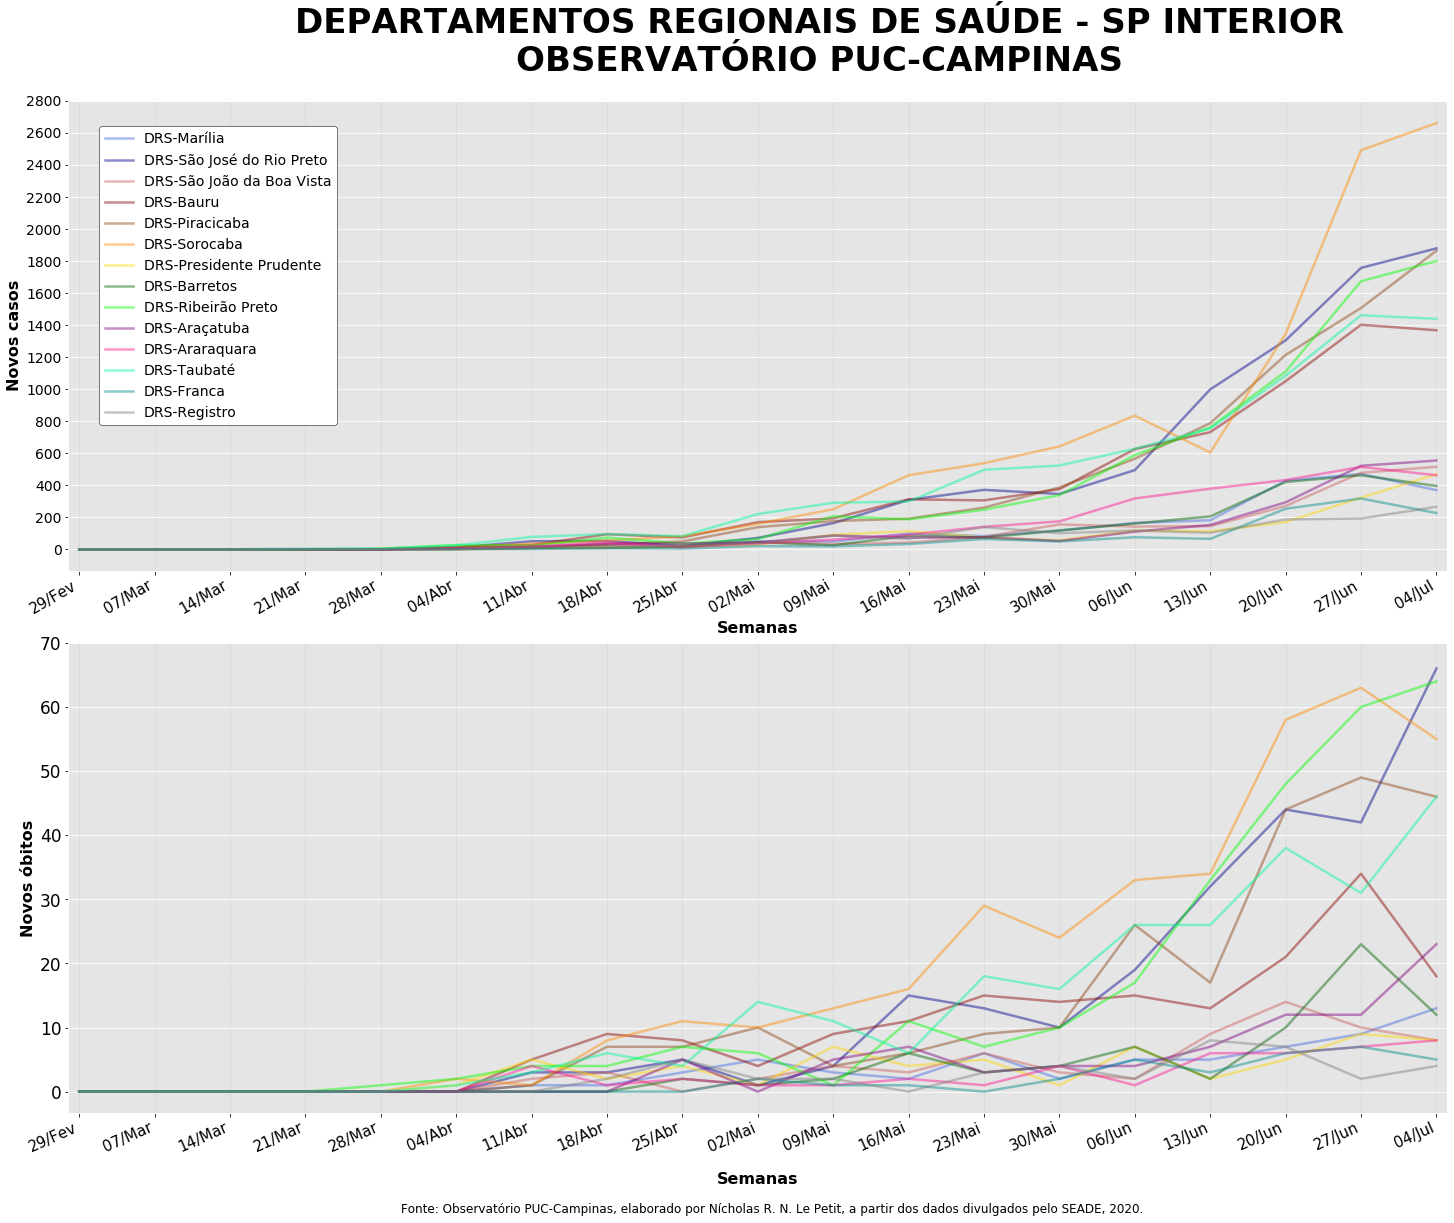

In [19]:
##### Grafico comparativo outras DRS




#plt.style.use('seaborn')
plt.style.use('ggplot')

pltblue = '#0072b2'
pltred = '#d55e00'
pltgreen = '#009e74'
plttextcolor = '#000000'
mpl.rcParams.update({'text.color': plttextcolor})


# Criando a estrutura de subplots
fig, (axcomp_sp1, axcomp_sp2) = plt.subplots(2,1,sharex=False, figsize=(20,16))
fig.subplots_adjust(hspace=25)


##########################################################################
############################# PLOTANDO CASOS #############################

#logo_observatorio = cbook.get_sample_data('logo_observatorio_pucc.png', asfileobj=False)
#logoplot = axnc1.imshow(logo_observatorio, aspect='auto', extent=(1,15,0.3,0.7), alpha=0.5, origin='upper', zorder=-1)

# axnc1 = dfcps_gweek.plot('date', 'newCases', marker="o", kind="line", =1=4, color=pltblue, x_compat=True, ax = axnc1_sp)
# axnc1b = dfrmc_gweek.plot('date', 'newCases', marker="o", kind="line", linewidth=4, color=pltgreen, x_compat=True, ax = axnc1_sp)
# axnc1c = df_ds_gweek.plot('date', 'newCases', marker="o", kind="line", linewidth=4, color=pltred, x_compat=True, ax = axnc1_sp)


# Plotando casos de outras DRS em cinza para referencia, com transparencia
axcomp1 = dfmarilia.plot('date', 'newCases', color = 'royalblue', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1e = dfsjrp.plot('date', 'newCases', color = 'darkblue', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1f = dfsjbv.plot('date', 'newCases', color = 'indianred', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1g = dfbauru.plot('date', 'newCases', color = 'darkred', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1h = dfpira.plot('date', 'newCases', color = 'saddlebrown', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1i = dfsorocaba.plot('date', 'newCases', color = 'darkorange', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1j = dfpp.plot('date', 'newCases', color = 'gold', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1k = dfbarretos.plot('date', 'newCases', color = 'darkgreen', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1l = dfribeirao.plot('date', 'newCases', color = 'lime', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1m = dfaracatuba.plot('date', 'newCases', color = 'purple', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1n = dfararaquara.plot('date', 'newCases', color = 'deeppink', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1o = dftaubate.plot('date', 'newCases', color = 'mediumspringgreen', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1p = dffranca.plot('date', 'newCases', color = 'darkcyan', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
#axcomp1q = dfgdesp.plot('date', 'newCases', color = '', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
axcomp1r = dfregistro.plot('date', 'newCases', color = 'gray', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)
#axcomp1s = dfbaixada.plot('date', 'newCases', color = 'indigo', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp1)


gweek_n = dfrmc_gweek.shape[0]
gweek_xmin = dfrmc_gweek['date'].iloc[0]
gweek_xmax = dfrmc_gweek['date'].iloc[-1]
axcomp1.set_xlim(gweek_xmin, gweek_xmax)
axcomp1.set_xticks(pd.date_range(gweek_xmin, periods=gweek_n, freq='W-SAT'))

gweek_ymax = dfsorocaba['newCases'].max()
axcomp1.xaxis.set_major_formatter(mdates.DateFormatter("%d/%b"))
axcomp1.set_yticks(np.arange(0,gweek_ymax+200,200), minor=False)
axcomp1.tick_params(axis='both', which='minor', labelsize=14)
axcomp1.tick_params(axis="x", which='both', colors = plttextcolor, labelsize=15)
axcomp1.tick_params(axis="y", which='both', colors = plttextcolor, labelsize=14)
axcomp1.grid(b=True, which='major', axis='x', color='lightgray', linestyle='--')
#axcomp1.grid(b=True, which='minor', axis='x', linestyle='--')
axcomp1.grid(b=True, which='major', axis='y', linestyle='-')

axcomp1.set_xlim('2020-02-28', '2020-07-05')

axcomp1.set_title("DEPARTAMENTOS REGIONAIS DE SAÚDE - SP INTERIOR\nOBSERVATÓRIO PUC-CAMPINAS", color=plttextcolor, fontweight='bold', fontsize=34)#52)
axcomp1.title.set_position([0.545,1.05])
#axcomp1.title.set_position([0.3525,1.03])
axcomp1.set_xlabel("Semanas", color=plttextcolor, fontsize=16, fontweight='bold')
axcomp1.set_ylabel("Novos casos", color=plttextcolor, fontsize=16, fontweight='bold')




legend = axcomp1.legend(labels=['DRS-Marília', 'DRS-São José do Rio Preto', 'DRS-São João da Boa Vista', 'DRS-Bauru', 'DRS-Piracicaba', 'DRS-Sorocaba',
                                'DRS-Presidente Prudente', 'DRS-Barretos', 'DRS-Ribeirão Preto', 'DRS-Araçatuba', 'DRS-Araraquara', 'DRS-Taubaté', 'DRS-Franca', 'DRS-Registro'], loc='upper right',
                      fancybox=True, fontsize=14, facecolor='#ffffff', edgecolor='black', frameon=True, shadow=False, framealpha=1, bbox_to_anchor=(0.2,0.96))

#for text in legend.get_texts():
#    plt.setp(text, fontweight='bold')


plt.tight_layout(pad=0)
#plt.tight_layout()


 
##########################################################################
############################# PLOTANDO OBITOS #############################
# axnc2 = dfcps_gweek.plot('date', 'newDeaths', marker="o", kind="line", linewidth=4, color=pltblue, x_compat=True, ax = axnc2_sp)#
# axnc2b = dfrmc_gweek.plot('date', 'newDeaths', marker="o", kind="line", linewidth=4, color=pltgreen, x_compat=True, ax = axnc2_sp)#
# axnc2c = df_ds_gweek.plot('date', 'newDeaths', marker="o", kind="line", linewidth=4, color=pltred, x_compat=True, ax = axnc2_sp)#


# Plotando obitos de outras DRS em cinza para referencia, com transparencia
axcomp2 = dfmarilia.plot('date', 'newDeaths', color='royalblue', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2e = dfsjrp.plot('date', 'newDeaths', color='darkblue', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2f = dfsjbv.plot('date', 'newDeaths', color='indianred', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2g = dfbauru.plot('date', 'newDeaths', color='darkred', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2h = dfpira.plot('date', 'newDeaths', color='saddlebrown', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2i = dfsorocaba.plot('date', 'newDeaths', color='darkorange', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2j = dfpp.plot('date', 'newDeaths', color='gold', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2k = dfbarretos.plot('date', 'newDeaths', color='darkgreen', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2l = dfribeirao.plot('date', 'newDeaths', color='lime', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2m = dfaracatuba.plot('date', 'newDeaths', color='purple', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2n = dfararaquara.plot('date', 'newDeaths', color='deeppink', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2o = dftaubate.plot('date', 'newDeaths', color='mediumspringgreen', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2p = dffranca.plot('date', 'newDeaths', color='darkcyan', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
#axcomp2q = dfgdesp.plot('date', 'newDeaths', color='', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
axcomp2r = dfregistro.plot('date', 'newDeaths', color='gray', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)
#axcomp2s = dfbaixada.plot('date', 'newDeaths', color='indigo', kind="line", linewidth=2.5, alpha = 0.45 , x_compat=True, ax = axcomp_sp2)


gweek_n = dfsorocaba.shape[0]
gweek_xmin = df_ds_gweek['date'].iloc[0]
gweek_xmax = df_ds_gweek['date'].iloc[-1]
axcomp2.set_xlim(gweek_xmin, gweek_xmax)
axcomp2.set_xticks(pd.date_range(gweek_xmin, periods=gweek_n, freq='W-SAT'))

gweek_ymax = dfsorocaba['newDeaths'].max()
axcomp2.xaxis.set_major_formatter(mdates.DateFormatter("%d/%b"))
axcomp2.set_yticks(np.arange(0,gweek_ymax+10,10), minor=False)
axcomp2.tick_params(axis='both', which='minor', labelsize=14)
axcomp2.tick_params(axis="x", which='both', colors = plttextcolor, labelsize=15, labelrotation=24)
axcomp2.tick_params(axis="y", which='both', colors = plttextcolor, labelsize=17)
axcomp2.grid(b=True, which='major', axis='x', color='lightgray', linestyle='--')
#axcomp2.grid(b=True, which='minor', axis='x', linestyle='--')
axcomp2.grid(b=True, which='both', axis='y', linestyle='-')

axcomp2.set_xlim('2020-02-28', '2020-07-05')

#axcomp2.set_title("Curva Epidemiológica - Óbitos", color=plttextcolor, fontsize=24)
axcomp2.set_xlabel("Semanas", color=plttextcolor, fontsize=16, fontweight='bold')
axcomp2.set_ylabel("Novos óbitos", color=plttextcolor, fontsize=16, fontweight='bold')
axcomp2.xaxis.set_label_coords(0.5,-0.125)
#axcomp2.legend(labels=['Campinas', 'Região Metropolitana de Campinas', 'Departamento Regional de Saúde - DRS VII - Campinas'], loc='upper left', fontsize=14, title="Legenda", facecolor='#f5f5f5', frameon=True, shadow=True, framealpha=1)#, bbox_to_anchor=(1.215,1.0175))
axcomp2.get_legend().remove()
plt.tight_layout(pad=0)




plt.annotate('Fonte: Observatório PUC-Campinas, elaborado por Nícholas R. N. Le Petit, a partir dos dados divulgados pelo SEADE, 2020.', (0,0), (333, -90), xycoords='axes fraction', textcoords='offset points', fontsize=12, va='top')





plt.savefig("04JUL_DRSs_JPG_300dpi_semifinal_slogo.jpg", dpi=300, bbox_inches='tight')